In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
from PIL import Image
def Load_Images(impath):
    imgs = []
    label = []
    l1 = os.listdir(impath)
    for i in l1:
        l2 = os.listdir(impath + '/' + i)
        for j in l2[:1000]:
            c = 0
            img = Image.open(impath + i + '/' + j)
            img = img.resize(size = (28,28))
            img = img.convert('L')
            #img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
    return np.array(imgs),label


In [3]:
x, y = Load_Images('/kaggle/input/compound-emotion-analysis/Training (1)/Training/')
a = pd.Series(y, dtype = 'category')

In [4]:
def plot_data(data, classes):
  
  values = data.value_counts().sort_index(ascending=True)
  plt.figure(figsize=[30, 10])
  
  plt.bar(x=classes, height=values, edgecolor='black')

  plt.xlabel("Emotions")
  plt.ylabel("Amount")
  plt.title("Amount of emotions")
  plt.show();

In [5]:
classes = ['Angrily Disguisted',
'Angrily Surprised',
'Happily Disguisted',
'Happily Surprised',
'Sadly Angry',
'Disgustedly Surprised',
'Fearfully Angry',
'Fearfully Disguisted',
'Fearfully Surprised',
'Sadly Disguisted',
'Sadly Fearful',
'Sadly Surprised',
'Awed',
'Hatred',
'Appalled']

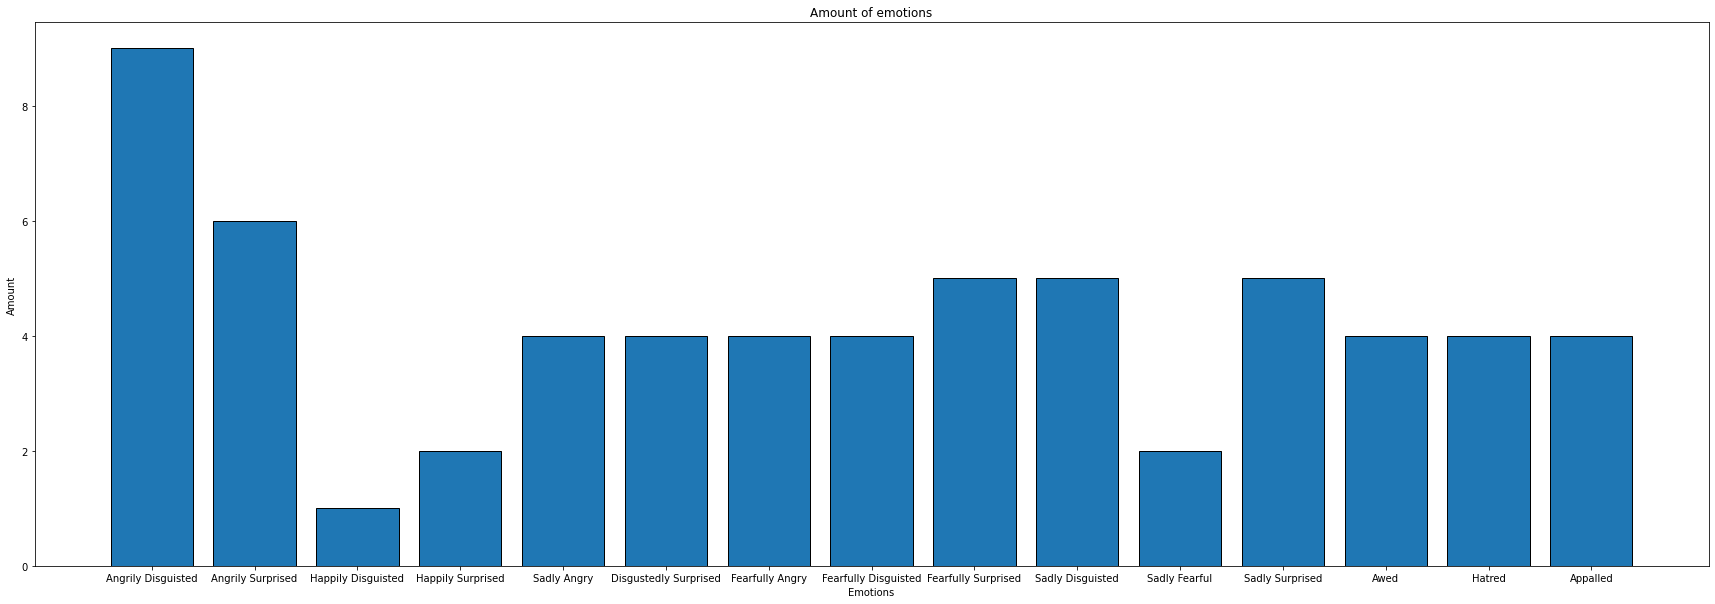

In [6]:
plot_data(a, classes)

In [7]:
import cv2

dataset_path = "/kaggle/input/compound-emotion-analysis/Training (1)/Training/"

label1 = list()
value1 = list()

for root, dirs, files in os.walk(dataset_path):
    emotion = os.path.basename(root)
    for file in files:
        path = os.path.join(root, file)
        label1.append(emotion)
        image = cv2.imread(path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        value1.append(img)

In [8]:
df_training = pd.DataFrame.from_dict({'emotions': label1, 'img': value1})

In [9]:
import cv2

dataset_path = "/kaggle/input/compound-emotion-analysis/Testing/Testing/"

label2 = list()
value2 = list()

for root, dirs, files in os.walk(dataset_path):
    emotion = os.path.basename(root)
    for file in files:
        path = os.path.join(root, file)
        label2.append(emotion)
        image = cv2.imread(path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        value2.append(img)

In [10]:
df_testing = pd.DataFrame.from_dict({'emotions': label2, 'img': value2})

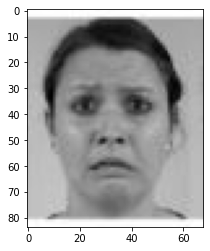

In [11]:
plt.imshow(df_training['img'][0], cmap='gray')
plt.show()

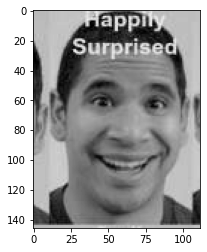

In [12]:
plt.imshow(df_testing['img'][1], cmap='gray')
plt.show()

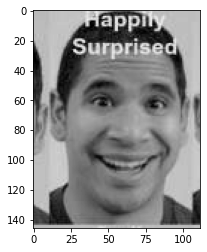

In [13]:

plt.imshow(df_testing['img'][1], cmap='gray')
plt.show()

In [14]:
df_training.to_csv('training_data.csv', index=False, encoding='utf-8-sig')
df_testing.to_csv('testing_data.csv', index=False, encoding='utf-8-sig')

In [15]:
import json
df_training['img'] = df_training['img'].transform(lambda x: json.dumps(x.tolist()))
df_testing['img'] = df_testing['img'].transform(lambda x: json.dumps(x.tolist()))

In [41]:
df_training['type'] = 'training'
df_testing['type'] = 'testing'

In [42]:

df = df_training.append(df_testing)
df


,emotions,img,type
0,Sadly Fearful,"[[253, 253, 253, 253, 254, 254, 254, 254, 253,...",training
1,Sadly Fearful,"[[236, 235, 236, 237, 236, 238, 238, 237, 237,...",training
2,Sadly Fearful,"[[7, 4, 11, 26, 31, 22, 13, 11, 22, 22, 21, 18...",training
3,Sadly Fearful,"[[251, 251, 253, 252, 252, 251, 252, 253, 254,...",training
4,Happily Surprised,"[[238, 238, 237, 240, 236, 238, 237, 237, 238,...",training
...,...,...,...
10,Happily Disguisted,"[[127, 127, 128, 128, 128, 128, 129, 129, 128,...",testing
11,Sadly Angry,"[[125, 126, 127, 128, 128, 128, 128, 128, 125,...",testing
12,Appalled,"[[238, 237, 239, 241, 237, 237, 238, 239, 238,...",testing
13,Hatred,"[[238, 238, 238, 238, 239, 238, 238, 237, 238,...",testing


In [44]:

df = df.reset_index(drop=True)


In [46]:

# training
df['img'] = df['img'].transform(lambda x: np.array(json.loads(x)))
df['shape'] = df['img'].transform(lambda x: x.shape)
df['height'] = df['shape'].transform(lambda x: x[0])
df['width'] = df['shape'].transform(lambda x: x[1])
df['image_resized'] = df['img'].transform(lambda img: cv2.resize(img, dsize=(round((df['width'].mean()+df['height'].mean())/2), round((df['width'].mean()+df['height'].mean())/2)), interpolation=cv2.INTER_LINEAR_EXACT))
df['image_resized_flattened'] = df['image_resized'].transform(lambda x: x.reshape((1, x.shape[0]*x.shape[1]))[0])

In [47]:
df['image_resized'][0].shape

(124, 124)

In [48]:
df['emotions'] = df['emotions'].map(lambda x: classes_map[x])

In [49]:
df


,emotions,img,type,shape,height,width,image_resized,image_resized_flattened
0,10,"[[253, 253, 253, 253, 254, 254, 254, 254, 253,...",training,"(84, 68)",84,68,"[[253, 253, 253, 253, 253, 253, 253, 254, 254,...","[253, 253, 253, 253, 253, 253, 253, 254, 254, ..."
1,10,"[[236, 235, 236, 237, 236, 238, 238, 237, 237,...",training,"(148, 105)",148,105,"[[236, 235, 236, 236, 237, 236, 238, 238, 237,...","[236, 235, 236, 236, 237, 236, 238, 238, 237, ..."
2,10,"[[7, 4, 11, 26, 31, 22, 13, 11, 22, 22, 21, 18...",training,"(141, 94)",141,94,"[[7, 5, 7, 13, 25, 29, 27, 20, 14, 12, 16, 21,...","[7, 5, 7, 13, 25, 29, 27, 20, 14, 12, 16, 21, ..."
3,10,"[[251, 251, 253, 252, 252, 251, 252, 253, 254,...",training,"(117, 92)",117,92,"[[251, 251, 252, 253, 252, 252, 252, 251, 252,...","[251, 251, 252, 253, 252, 252, 252, 251, 252, ..."
4,3,"[[238, 238, 237, 240, 236, 238, 237, 237, 238,...",training,"(149, 112)",149,112,"[[238, 238, 237, 239, 238, 237, 237, 237, 237,...","[238, 238, 237, 239, 238, 237, 237, 237, 237, ..."
...,...,...,...,...,...,...,...,...
73,2,"[[127, 127, 128, 128, 128, 128, 129, 129, 128,...",testing,"(139, 91)",139,91,"[[127, 127, 127, 128, 128, 128, 128, 128, 129,...","[127, 127, 127, 128, 128, 128, 128, 128, 129, ..."
74,4,"[[125, 126, 127, 128, 128, 128, 128, 128, 125,...",testing,"(135, 95)",135,95,"[[125, 126, 126, 127, 128, 128, 128, 128, 128,...","[125, 126, 126, 127, 128, 128, 128, 128, 128, ..."
75,14,"[[238, 237, 239, 241, 237, 237, 238, 239, 238,...",testing,"(153, 106)",153,106,"[[238, 237, 238, 240, 239, 237, 237, 238, 239,...","[238, 237, 238, 240, 239, 237, 237, 238, 239, ..."
76,13,"[[238, 238, 238, 238, 239, 238, 238, 237, 238,...",testing,"(155, 104)",155,104,"[[238, 238, 238, 238, 238, 239, 238, 238, 237,...","[238, 238, 238, 238, 238, 239, 238, 238, 237, ..."


In [50]:
df_training = df.loc[df['type'] == 'training']
df_testing = df.loc[df['type'] == 'testing']
df_training = df_training.reset_index(drop=True)
df_testing = df_testing.reset_index(drop=True)

In [51]:
X_train = df_training['image_resized']
X_test = df_testing['image_resized']
y_train = df_training["emotions"]
y_test = df_testing["emotions"]

In [52]:
!mkdir data
!mkdir data\train
!mkdir data\test

In [53]:
import cv2
import os

def put_in_dir(X_train, X_test, y_train, y_test, classes):
    for label in range(len(classes)):
        os.makedirs("./data/train/" + classes[label], exist_ok=True)
        os.makedirs("./data/test/" + classes[label], exist_ok=True)

    for i in range(len(X_train)):
        emotion = classes[y_train[i]]
        cv2.imwrite(f"./data/train/{emotion}/{emotion}{i}.png", X_train[i])

    for j in range(len(X_test)):
        emotion = classes[y_test[j]]
        cv2.imwrite(f"./data/test/{emotion}/{emotion}{j}.png", X_test[j])

In [71]:
put_in_dir(X_train, X_test, y_train, y_test, classes)

In [70]:
X_train[0].shape

(124, 124)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (124, 124)
BATCH_SIZE = 64

train_dir = "./data/train/"
test_dir =  "./data/test/"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical",
                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")


Found 63 images belonging to 15 classes.
Found 15 images belonging to 15 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [59]:
# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(124, 124, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(15, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
model_1.fit(train_data, epochs=80, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)


Epoch 1/80
1/1 [==============================] - 111s 111s/step - loss: 8.9917 - accuracy: 0.0635 - val_loss: 2.6960 - val_accuracy: 0.1333

Epoch 00001: val_loss improved from inf to 2.69605, saving model to checkpoint/


2022-12-07 04:02:34.975769: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/80
1/1 [==============================] - 109s 109s/step - loss: 11.7733 - accuracy: 0.0794 - val_loss: 2.6941 - val_accuracy: 0.0667

Epoch 00002: val_loss improved from 2.69605 to 2.69412, saving model to checkpoint/
Epoch 3/80
1/1 [==============================] - 106s 106s/step - loss: 10.3311 - accuracy: 0.0794 - val_loss: 2.7033 - val_accuracy: 0.0667

Epoch 00003: val_loss did not improve from 2.69412
Epoch 4/80
1/1 [==============================] - 108s 108s/step - loss: 6.7350 - accuracy: 0.1270 - val_loss: 2.7314 - val_accuracy: 0.0667

Epoch 00004: val_loss did not improve from 2.69412
Epoch 5/80
1/1 [==============================] - 107s 107s/step - loss: 6.2290 - accuracy: 0.1270 - val_loss: 2.7567 - val_accuracy: 0.0667

Epoch 00005: val_loss did not improve from 2.69412
Epoch 6/80
1/1 [==============================] - 107s 107s/step - loss: 6.5544 - accuracy: 0.1429 - val_loss: 2.7841 - val_accuracy: 0.0667

Epoch 00006: val_loss did not improve from 2.69412


In [61]:
model_1.save("model.h5")

In [66]:
!zip -r /c

	zip warning: name not matched: /content/checkpoint

zip error: Nothing to do! (try: zip -r /content/file.zip . -i /content/checkpoint)


In [3]:
def detect_emotion(frame):
    model = tf.keras.models.load_model("model.h5")

    emotion = list(model.predict(tf.expand_dims(frame, axis=0)))
    num = max(emotion[0])
    idx = list(emotion[0]).index(num)

    return idx, num